In [4]:
import fitz
import os
import cv2
from image_processing import correct_perspective, detect_answer_boxes
from ocr_processing import segment_and_ocr

In [5]:
def pdf_to_images(pdf_path, output_folder="output_images"):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    doc = fitz.open(pdf_path)
    image_paths = []

    for page_number in range(len(doc)):
        page = doc[page_number]
        pix = page.get_pixmap(dpi=300)
        img_path = os.path.join(output_folder, f"page_{page_number+1}.png")
        pix.save(img_path)
        image_paths.append(img_path)

    return image_paths

[INFO] Mengubah PDF ke gambar...
[INFO] Memproses output_images\page_1.png...
✅ [Perspective] Koreksi perspektif berhasil (robust mode).
✅ [Boxes] Jumlah kotak terdeteksi: 8


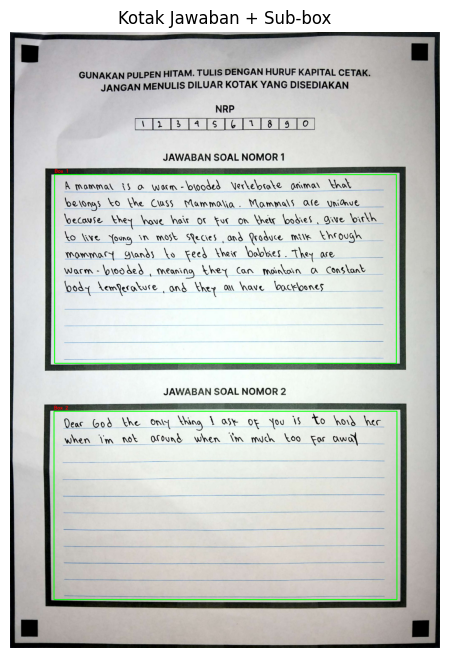

[INFO] OCR selesai. Hasil tersimpan di hasil_ocr.txt


In [6]:
pdf_path = "files/test5.pdf"
print("[INFO] Mengubah PDF ke gambar...")
images = pdf_to_images(pdf_path)

all_text = []

for img_path in images:
   print(f"[INFO] Memproses {img_path}...")

   # 1. Load gambar
   image = cv2.imread(img_path)

   # 2. Koreksi perspektif
   processed_img = correct_perspective(image)

   # 3. Deteksi kotak jawaban
   answer_boxes = detect_answer_boxes(processed_img, max_boxes=2, visualize=True)

   # 4. OCR tiap kotak jawaban
   for i, crop in enumerate(answer_boxes):
      text = segment_and_ocr(crop)
      all_text.append(text)

final_text = "\n".join(all_text)

# 5. Simpan hasil ke file
with open("hasil_ocr.txt", "w", encoding="utf-8") as f:
   f.write(final_text)

print("[INFO] OCR selesai. Hasil tersimpan di hasil_ocr.txt")